## Download data

We illustrate the usage of LOG-TRAM by applying it to the GWAS summary statistics of 17 traits from AFR and EUR/EAS with 1 Mbp non-overlapping sliding windows as local regions. The LDscores files involved in the following example are availabel from [here](https://www.dropbox.com/sh/9asugdlu1lbal8o/AAB0martsgaBoR8B4hq2pc25a?dl=0).
The AFR and EUR/EAS GWAS datasets were obtained from the links summarized in Table S5

## Run LOG-TRAM

Once the input files are formatted, LOG-TRAM will automatically preprocess the datasets, including SNPs overlapping and minor allele matching.

#### Combine AFR and EUR

In [9]:
Traits = ['MCV', 'HbA1c', 'WBC', 'Lym', 'MCHC', 'RBC', 'Eosino',
       'Baso', 'FG', 'Mono', 'Plt', 'FI', 'Neutro', 'MCH',
       'HDL', 'LDL', 'TC']

log_tram_com = 'python <install path>/src/LOG-TRAM.py \
--out ./EUR_AFR/{0}_meta \
--sumstats-popu1 {0}_harmonized_pop1_EUR.txt,{0}_EUR \
--sumstats-popu2 {0}_harmonized_pop2_AFR.txt,{0}_AFR \
--ldscores ./LDscoresEUR-AFR/ldsc_annot_EUR_AFR_1mb_TGP_hm3_chr@_std\n'
for i in Traits:
    print(log_tram_com.format(i))

python <install path>/src/LOG-TRAM.py --out ./EUR_AFR/MCV_meta --sumstats-popu1 MCV_harmonized_pop1_EUR.txt,MCV_EUR --sumstats-popu2 MCV_harmonized_pop2_AFR.txt,MCV_AFR --ldscores ./LDscoresEUR-AFR/ldsc_annot_EUR_AFR_1mb_TGP_hm3_chr@_std

python <install path>/src/LOG-TRAM.py --out ./EUR_AFR/HbA1c_meta --sumstats-popu1 HbA1c_harmonized_pop1_EUR.txt,HbA1c_EUR --sumstats-popu2 HbA1c_harmonized_pop2_AFR.txt,HbA1c_AFR --ldscores ./LDscoresEUR-AFR/ldsc_annot_EUR_AFR_1mb_TGP_hm3_chr@_std

python <install path>/src/LOG-TRAM.py --out ./EUR_AFR/WBC_meta --sumstats-popu1 WBC_harmonized_pop1_EUR.txt,WBC_EUR --sumstats-popu2 WBC_harmonized_pop2_AFR.txt,WBC_AFR --ldscores ./LDscoresEUR-AFR/ldsc_annot_EUR_AFR_1mb_TGP_hm3_chr@_std

python <install path>/src/LOG-TRAM.py --out ./EUR_AFR/Lym_meta --sumstats-popu1 Lym_harmonized_pop1_EUR.txt,Lym_EUR --sumstats-popu2 Lym_harmonized_pop2_AFR.txt,Lym_AFR --ldscores ./LDscoresEUR-AFR/ldsc_annot_EUR_AFR_1mb_TGP_hm3_chr@_std

python <install path>/src/LOG-TRAM

#### Combine AFR and EAS

In [10]:
Traits = ['MCV', 'HbA1c', 'WBC', 'Lym', 'MCHC', 'RBC', 'Eosino',
       'Baso', 'FG', 'Mono', 'Plt', 'FI', 'Neutro', 'MCH',
       'HDL', 'LDL', 'TC']

log_tram_com = 'python <install path>/src/LOG-TRAM.py \
--out ./EAS_AFR/{0}_meta \
--sumstats-popu1 {0}_harmonized_pop1_EAS.txt,{0}_EAS \
--sumstats-popu2 {0}_harmonized_pop2_AFR.txt,{0}_AFR \
--ldscores ./LDscoresEAS-AFR/ldsc_annot_EAS_AFR_1mb_TGP_hm3_chr@_std\n'
for i in Traits:
    print(log_tram_com.format(i))

python <install path>/src/LOG-TRAM.py --out ./EAS_AFR/MCV_meta --sumstats-popu1 MCV_harmonized_pop1_EAS.txt,MCV_EAS --sumstats-popu2 MCV_harmonized_pop2_AFR.txt,MCV_AFR --ldscores ./LDscoresEAS-AFR/ldsc_annot_EAS_AFR_1mb_TGP_hm3_chr@_std

python <install path>/src/LOG-TRAM.py --out ./EAS_AFR/HbA1c_meta --sumstats-popu1 HbA1c_harmonized_pop1_EAS.txt,HbA1c_EAS --sumstats-popu2 HbA1c_harmonized_pop2_AFR.txt,HbA1c_AFR --ldscores ./LDscoresEAS-AFR/ldsc_annot_EAS_AFR_1mb_TGP_hm3_chr@_std

python <install path>/src/LOG-TRAM.py --out ./EAS_AFR/WBC_meta --sumstats-popu1 WBC_harmonized_pop1_EAS.txt,WBC_EAS --sumstats-popu2 WBC_harmonized_pop2_AFR.txt,WBC_AFR --ldscores ./LDscoresEAS-AFR/ldsc_annot_EAS_AFR_1mb_TGP_hm3_chr@_std

python <install path>/src/LOG-TRAM.py --out ./EAS_AFR/Lym_meta --sumstats-popu1 Lym_harmonized_pop1_EAS.txt,Lym_EAS --sumstats-popu2 Lym_harmonized_pop2_AFR.txt,Lym_AFR --ldscores ./LDscoresEAS-AFR/ldsc_annot_EAS_AFR_1mb_TGP_hm3_chr@_std

python <install path>/src/LOG-TRAM

# Visualize results

In [6]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.style as style 
import matplotlib.pyplot as plt
import pylab
import matplotlib
import copy
import glob as gb
np.set_printoptions(precision=3)

from adjustText import adjust_text

style.use('ggplot')
style.use('seaborn-white')
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context('paper',font_scale=2) 

pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

## Effective sample size

In [7]:
Traits = ['MCV', 'HbA1c', 'WBC', 'Lym', 'MCHC', 'RBC', 'Eosino',
       'Baso', 'FG', 'Mono', 'Plt', 'FI', 'Neutro', 'MCH',
       'HDL', 'LDL', 'TC']
gwas_n = []
meta_n = []
for i in Traits:
    eas_meta = pd.read_csv('./EUR_AFR/{0}_meta_TRAM_pop2_{0}_AFR.txt'.format(i),sep='\t')
    gwas_n.append(eas_meta['N'].median())
    meta_n.append(eas_meta['N_eff'].median())

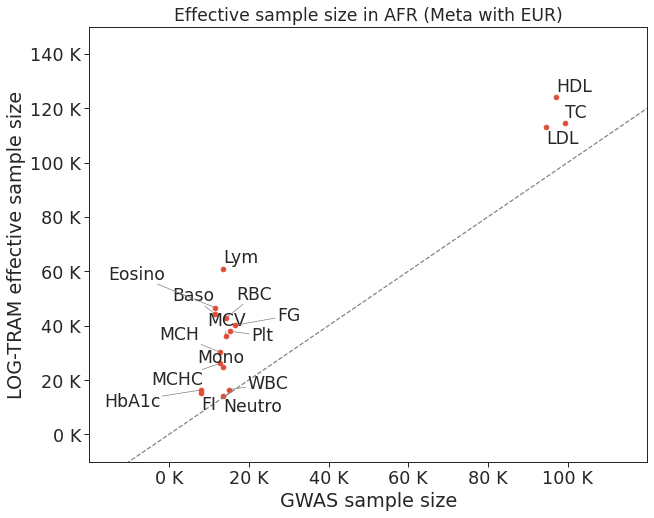

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.set_context('paper',font_scale=1.8)
plt.scatter(gwas_n, meta_n)
plt.plot(np.arange(-20000, 120000),np.arange(-20000, 120000),'--',c='grey')
    
texts = []
for x, y, s in zip(gwas_n, meta_n, Traits):
    texts.append(plt.text(x, y, s))

adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="-", color='grey', lw=0.7))

plt.xlim((-20000, 120000))
plt.ylim((-10000, 150000))

plt.xlabel('GWAS sample size')
plt.ylabel('LOG-TRAM effective sample size')
plt.title('Effective sample size in AFR (Meta with EUR)')

plt.xticks(range(0,120000,20000))
ax.set_xticklabels(['{} K'.format(_) for _ in range(0,120,20)])

plt.yticks(range(0,150000,20000))
ax.set_yticklabels(['{} K'.format(_) for _ in range(0,150,20)])

plt.show()

In [24]:
meta2_n = []
for i in Traits:
    eas_meta = pd.read_csv('./EAS_AFR/{0}_meta_TRAM_pop2_{0}_AFR.txt'.format(i),sep='\t')
    meta2_n.append(eas_meta['N_eff'].median())

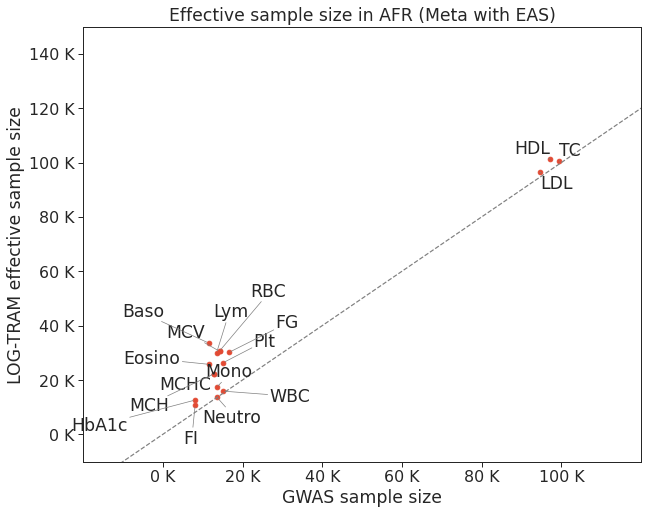

In [28]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.set_context('paper',font_scale=1.8)
plt.scatter(gwas_n, meta2_n)
plt.plot(np.arange(-20000, 120000),np.arange(-20000, 120000),'--',c='grey')
    
texts = []
for x, y, s in zip(gwas_n, meta2_n, Traits):
    texts.append(plt.text(x, y, s))

adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="-", color='grey', lw=0.7))

plt.xlim((-20000, 120000))
plt.ylim((-10000, 150000))

plt.xlabel('GWAS sample size')
plt.ylabel('LOG-TRAM effective sample size')
plt.title('Effective sample size in AFR (Meta with EAS)')

plt.xticks(range(0,120000,20000))
ax.set_xticklabels(['{} K'.format(_) for _ in range(0,120,20)])

plt.yticks(range(0,150000,20000))
ax.set_yticklabels(['{} K'.format(_) for _ in range(0,150,20)])

plt.show()

## Lead SNPs number

In [81]:
cytoBand = pd.read_csv('/import/home/share/xiaojs/database/annovar/humandb/hg19_cytoBand.txt',sep='\t',header=None)
cytoBand['chr'] = cytoBand[0].map(lambda x:x[3:])

def AnnotatecytoBand(c,bp):
    tmp = cytoBand.loc[(cytoBand['chr']==c)&(cytoBand[1]<=bp)&(cytoBand[2]>=bp)]
    return tmp['chr'].values[0]+tmp[3].values[0]

def add_locus(gwas):
    gwas_sig = gwas.loc[gwas['P']<=5e-8].reset_index(drop=True)
    loci = []
    c = 0
    bp = -1
    l = -1
    for row in gwas_sig.iterrows():
        if c!=row[1]['CHR'] or row[1]['BP']-bp>1000000:
            c = row[1]['CHR']
            bp = row[1]['BP']
            l += 1
        loci.append(l)
    gwas_sig['loci'] = loci
    gwas_sig = gwas_sig.loc[gwas_sig.groupby('loci')['P'].idxmin()].reset_index(drop=True)
    if gwas_sig.shape[0] == 0:
        gwas_sig['cytoBand'] = None
        return gwas_sig
    gwas_sig['cytoBand'] = gwas_sig.apply(lambda x:AnnotatecytoBand(str(x['CHR']),x['BP']),axis=1)
    return gwas_sig

In [82]:
Traits = ['MCV', 'HbA1c', 'WBC', 'Lym', 'MCHC', 'RBC', 'Eosino',
       'Baso', 'FG', 'Mono', 'Plt', 'FI', 'Neutro', 'MCH',
       'HDL', 'LDL', 'TC']
afr_n = []
eur_n, eur_novel_n = [], []
eas_n, eas_novel_n = [], []
for i in Traits:
    print(i,end=',')
    afr_gwas = pd.read_csv('./EUR_AFR/{0}_meta_harmonized_pop2_{0}_AFR.txt'.format(i),sep='\t')
    eur_meta = pd.read_csv('./EUR_AFR/{0}_meta_TRAM_pop2_{0}_AFR.txt'.format(i),sep='\t')
    eas_meta = pd.read_csv('./EAS_AFR/{0}_meta_TRAM_pop2_{0}_AFR.txt'.format(i),sep='\t')
    gwas_sig = add_locus(afr_gwas) 
    eur_meta_sig = add_locus(eur_meta) 
    eas_meta_sig = add_locus(eas_meta) 
    afr_n.append(gwas_sig.shape[0])
    eur_n.append(eur_meta_sig.shape[0])
    eas_n.append(eas_meta_sig.shape[0])
    if gwas_sig.shape != 0:
        eur_novel_n.append(eur_meta_sig.loc[~eur_meta_sig['cytoBand'].isin(gwas_sig['cytoBand'].unique())].shape[0])
        eas_novel_n.append(eas_meta_sig.loc[~eas_meta_sig['cytoBand'].isin(gwas_sig['cytoBand'].unique())].shape[0])
    else:
        eur_novel_n.append(eur_meta_sig.shape[0])
        eas_novel_n.append(eas_meta_sig.shape[0])

MCV,HbA1c,WBC,Lym,MCHC,RBC,Eosino,Baso,FG,Mono,Plt,FI,Neutro,MCH,HDL,LDL,TC,

In [113]:
sort_index = np.argsort(afr_n)
afr_n = np.array(afr_n)[sort_index]
eas_n = np.array(eas_n)[sort_index]
eur_n = np.array(eur_n)[sort_index]

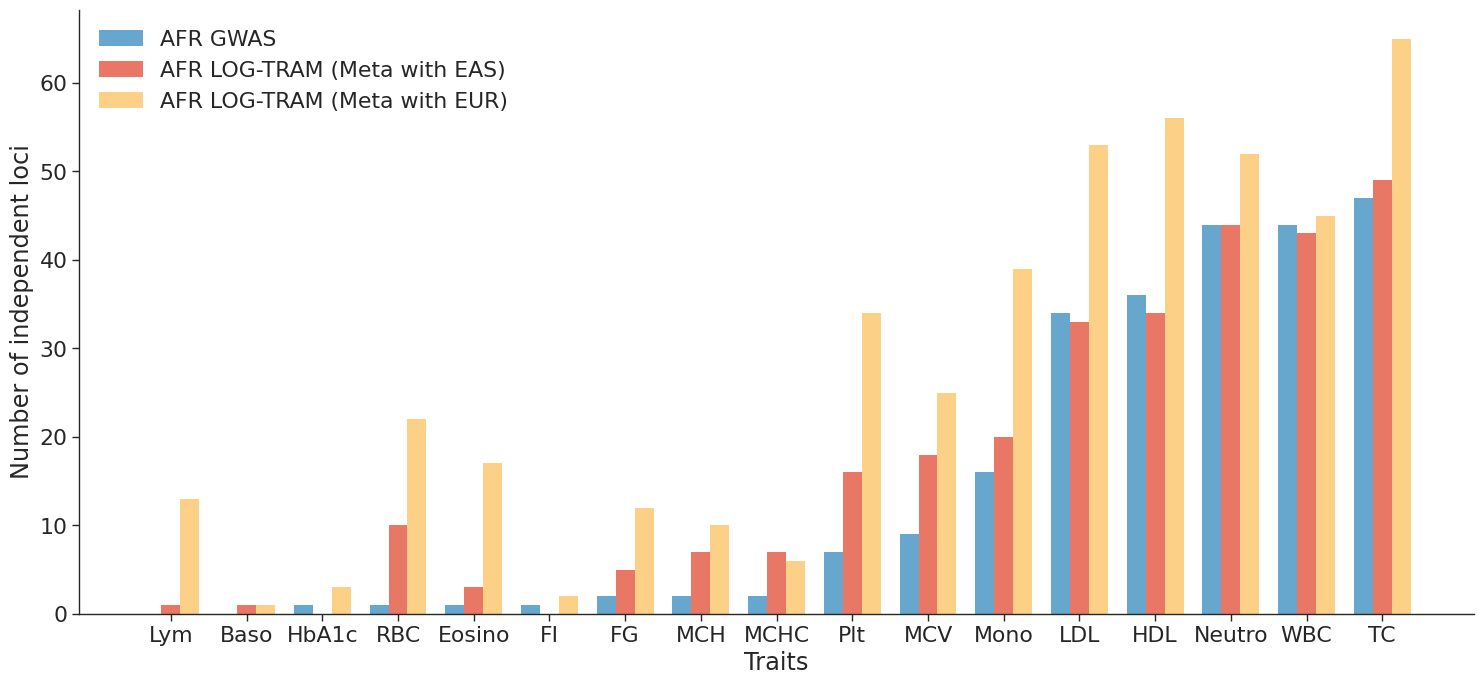

In [150]:
fig, ax = plt.subplots(1,1,figsize=(18,8))
sns.set_context('paper',font_scale=1.8)

width=0.25
alpha=0.75
plt.bar(np.arange(len(afr_n))-width, afr_n, width=width,label='AFR GWAS',color='C1',alpha=alpha)
plt.bar(np.arange(len(eas_n)), eas_n, width=width,label='AFR LOG-TRAM (Meta with EAS)',color='C0',alpha=alpha)
plt.bar(np.arange(len(eur_n))+width, eur_n, width=width,label='AFR LOG-TRAM (Meta with EUR)',color='C4',alpha=alpha)

plt.xlabel('Traits')
plt.ylabel('Number of independent loci')
plt.legend(loc=2)
plt.xticks(range(len(afr_n)))
ax.set_xticklabels(np.array(Traits)[sort_index])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    
plt.show()

## QQ-plots

In [132]:
import sys  
sys.path.append('./LOG-TRAM/src')
from plots import *

In [147]:
i = 'Eosino'
afr_gwas = pd.read_csv('./EUR_AFR/{0}_meta_harmonized_pop2_{0}_AFR.txt'.format(i),sep='\t')
eur_meta = pd.read_csv('./EUR_AFR/{0}_meta_TRAM_pop2_{0}_AFR.txt'.format(i),sep='\t')
eas_meta = pd.read_csv('./EAS_AFR/{0}_meta_TRAM_pop2_{0}_AFR.txt'.format(i),sep='\t')

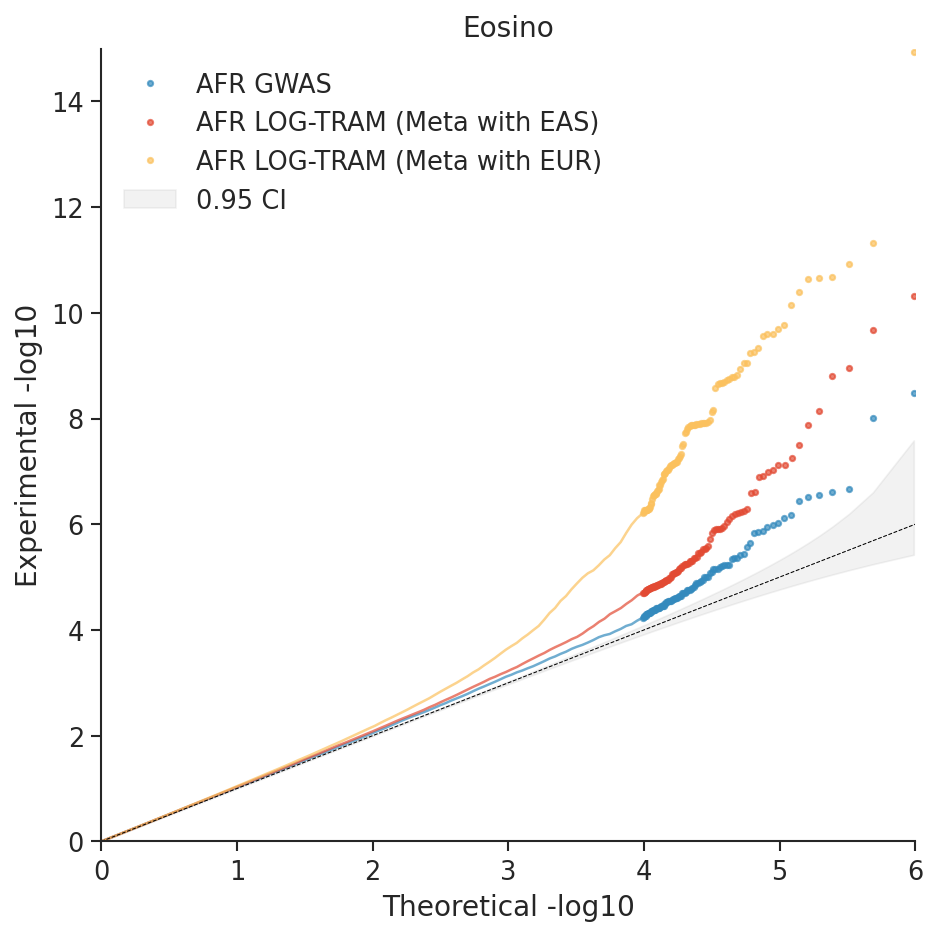

In [148]:
sns.set_context('paper',font_scale=1.4) 
mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=7,7
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
fig, ax = plt.subplots(1,1,dpi=150)
qqplot([afr_gwas['P'],eas_meta['P'],eur_meta['P']], 
       ['AFR GWAS','AFR LOG-TRAM (Meta with EAS)','AFR LOG-TRAM (Meta with EUR)'], 
       color=['C1', 'C0', 'C4', 'C3', 'C4', 'C5'],
       shape=['.','.','.'],
       error_type='theoretical', 
       distribution='beta',
       n_quantiles = 100,
       ms=5,
       title='{}'.format(i),ax=ax)